**KLASIFIKASI CITRA ALAT TULIS MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os

drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


In [ ]:
base_dir='/content/drive/My Drive/Data Klasifikasi Pensil dan Penghapus'
!ls '/content/drive/My Drive/Data Klasifikasi Pensil dan Penghapus'

Bahan  data  Test  Train


In [ ]:
#menentukan direktori
bahan_dir=os.path.join(base_dir,'Bahan')
train_dir=os.path.join(base_dir,'Train')
test_dir=os.path.join(base_dir,'Test')

In [ ]:
#menentukan direktori isi bahan
pensil_dir=os.path.join(bahan_dir, 'pensil/')
penghapus_dir=os.path.join(bahan_dir, 'penghapus/')

print("jumlah data train tiap kelas")
print("jumlah gambar pensil     :", len(os.listdir(pensil_dir)))
print("jumlah gambar penghapus  :", len(os.listdir(penghapus_dir)))

jumlah data train tiap kelas
jumlah gambar pensil     : 50
jumlah gambar penghapus  : 50


In [ ]:
#Direktori isi latih/training
train_pensil=os.path.join(train_dir, 'pensil/')
train_penghapus=os.path.join(train_dir, 'penghapus/')

#Direktori isi validasi
test_pensil=os.path.join(test_dir, 'pensil/')
test_penghapus=os.path.join(test_dir, 'penghapus/')

Menyiapkan Dataset

In [ ]:
import random
from shutil import copyfile 

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio *total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.8

#pembagian training dan validasi
#training
source_00 = pensil_dir
train_00 = train_pensil
test_00 = test_pensil
train_val_split(source_00, train_00, test_00, train_ratio)

#validasi
source_01 = penghapus_dir
train_01 = train_penghapus
test_01 = test_penghapus
train_val_split(source_01, train_01, test_01, train_ratio)

In [ ]:
print('Jumlah All pensil   :', len(os.listdir(pensil_dir)))
print('Jumlah Train pensil :', len(os.listdir(train_pensil)))
print('Jumlah Test pensil   :', len(os.listdir(test_pensil)))

Jumlah All pensil   : 50
Jumlah Train pensil : 48
Jumlah Test pensil   : 18


In [ ]:
print('Jumlah All penghapus   :', len(os.listdir(penghapus_dir)))
print('Jumlah Train penghapus :', len(os.listdir(train_penghapus)))
print('Jumlah Test penghapus   :', len(os.listdir(test_penghapus)))

Jumlah All penghapus   : 50
Jumlah Train penghapus : 47
Jumlah Test penghapus   : 17


Pre Processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3, 
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3, 
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

Target

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 95 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True
  
callbacks = myCallback()

Model CNN

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3, seed = 112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5, seed = 112),
          tf.keras.layers.Dense(2, activation = 'sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy']
)

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch = 8,
            epochs = 40,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/40
8/8 [==============================] - 7s 720ms/step - loss: 0.9508 - accuracy: 0.4000 - val_loss: 0.6874 - val_accuracy: 0.7000
Epoch 2/40
8/8 [==============================] - 4s 494ms/step - loss: 0.6828 - accuracy: 0.6133 - val_loss: 0.7016 - val_accuracy: 0.3000
Epoch 3/40
8/8 [==============================] - 3s 434ms/step - loss: 0.6612 - accuracy: 0.6133 - val_loss: 0.6081 - val_accuracy: 0.6000
Epoch 4/40
8/8 [==============================] - 2s 289ms/step - loss: 0.6431 - accuracy: 0.6267 - val_loss: 0.5260 - val_accuracy: 0.6000
Epoch 5/40
8/8 [==============================] - 2s 280ms/step - loss: 0.5218 - accuracy: 0.7733 - val_loss: 0.7303 - val_accuracy: 0.4000
Epoch 6/40
8/8 [==============================] - 2s 292ms/step - loss: 0.6035 - accuracy: 0.7067 - val_loss: 0.5120 - val_accuracy: 0.8000
Epoch 7/40
8/8 [==============================] - 2s 268ms/step - loss: 0.4980 - accuracy: 0.7200 - val_loss: 0.2391 - val_accuracy: 1.0000
Epoch 8/40
8/8 [====

Tingkat akurasi dan loss model

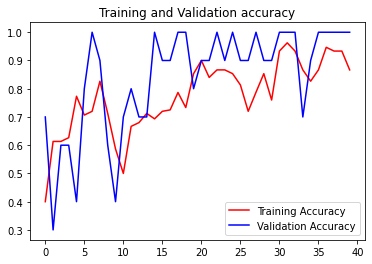

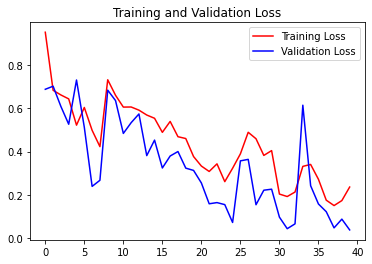

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()

Mencoba Klasifikasi

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(50):
    if classes [0][j] -- 1. :
      print('This image belongs to class', class_list[j-1])
      break
      